In [ ]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_theme(style="darkgrid")

from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

from collections import Counter

from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#lendo o arquivo
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [ ]:
#renomeando as colunas
df.rename(columns={'fixed acidity': 'acidez_fixa', 'volatile acidity': 'acidez_volatil', 'citric acid': 'acido_citrico', 
                   'residual sugar': 'acucar_residual', 'chlorides': 'cloretos', 'free sulfur dioxide': 'dioxido_enxofre_livre',
                   'total sulfur dioxide': 'dioxido_enxofre_total', 'density': 'densidade', 'sulphates': 'sulfatos', 
                   'alcohol': 'alcool', 'quality': 'qualidade'}, inplace = True)

ANALISE DOS DADOS

In [ ]:
#verificando tamanho do data frame
df.shape

(4898, 12)

In [ ]:
#verificando tipos de dados e presença de NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            4898 non-null   float64
 1   acidez_volatil         4898 non-null   float64
 2   acido_citrico          4898 non-null   float64
 3   acucar_residual        4898 non-null   float64
 4   cloretos               4898 non-null   float64
 5   dioxido_enxofre_livre  4898 non-null   float64
 6   dioxido_enxofre_total  4898 non-null   float64
 7   densidade              4898 non-null   float64
 8   pH                     4898 non-null   float64
 9   sulfatos               4898 non-null   float64
 10  alcool                 4898 non-null   float64
 11  qualidade              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#verificando os dados
df.head()

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          7.2            0.23           0.32              8.5     0.058   

   dioxido_enxofre_livre  dioxido_enxofre_total  densidade    pH  sulfatos  \
0                   45.0                  170.0     1.0010  3.00      0.45   
1                   14.0                  132.0     0.9940  3.30      0.49   
2                   30.0                   97.0     0.9951  3.26      0.44   
3                   47.0                  186.0     0.9956  3.19      0.40   
4                   47.0                  186.0     0.9956  3.19      0.40   

   alcool  qualidade  
0     8.8          6  
1     9.5          6  
2    10.1          6  
3     9.9          6  
4     9.9          6

In [ ]:
#verificando dados statisticos
df.describe().T

count        mean        std      min         25%  \
acidez_fixa            4898.0    6.854788   0.843868  3.80000    6.300000   
acidez_volatil         4898.0    0.278241   0.100795  0.08000    0.210000   
acido_citrico          4898.0    0.334192   0.121020  0.00000    0.270000   
acucar_residual        4898.0    6.391415   5.072058  0.60000    1.700000   
cloretos               4898.0    0.045772   0.021848  0.00900    0.036000   
dioxido_enxofre_livre  4898.0   35.308085  17.007137  2.00000   23.000000   
dioxido_enxofre_total  4898.0  138.360657  42.498065  9.00000  108.000000   
densidade              4898.0    0.994027   0.002991  0.98711    0.991723   
pH                     4898.0    3.188267   0.151001  2.72000    3.090000   
sulfatos               4898.0    0.489847   0.114126  0.22000    0.410000   
alcool                 4898.0   10.514267   1.230621  8.00000    9.500000   
qualidade              4898.0    5.877909   0.885639  3.00000    5.000000   

                             50%       75%        max  
acidez_fixa              6.80000    7.3000   14.20000  
acidez_volatil           0.26000    0.3200    1.10000  
acido_citrico            0.32000    0.3900    1.66000  
acucar_residual          5.20000    9.9000   65.80000  
cloretos                 0.04300    0.0500    0.34600  
dioxido_enxofre_livre   34.00000   46.0000  289.00000  
dioxido_enxofre_total  134.00000  167.0000  440.00000  
densidade                0.99374    0.9961    1.03898  
pH                       3.18000    3.2800    3.82000  
sulfatos                 0.47000    0.5500    1.08000  
alcool                  10.40000   11.4000   14.20000  
qualidade                6.00000    6.0000    9.00000

ANALISE GRAFICA

In [ ]:
#graficos boxplot

<ipython-input-7-d4e8311ae391>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 2, 7)
<ipython-input-7-d4e8311ae391>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 2, 7)
<ipython-input-7-d4e8311ae391>:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

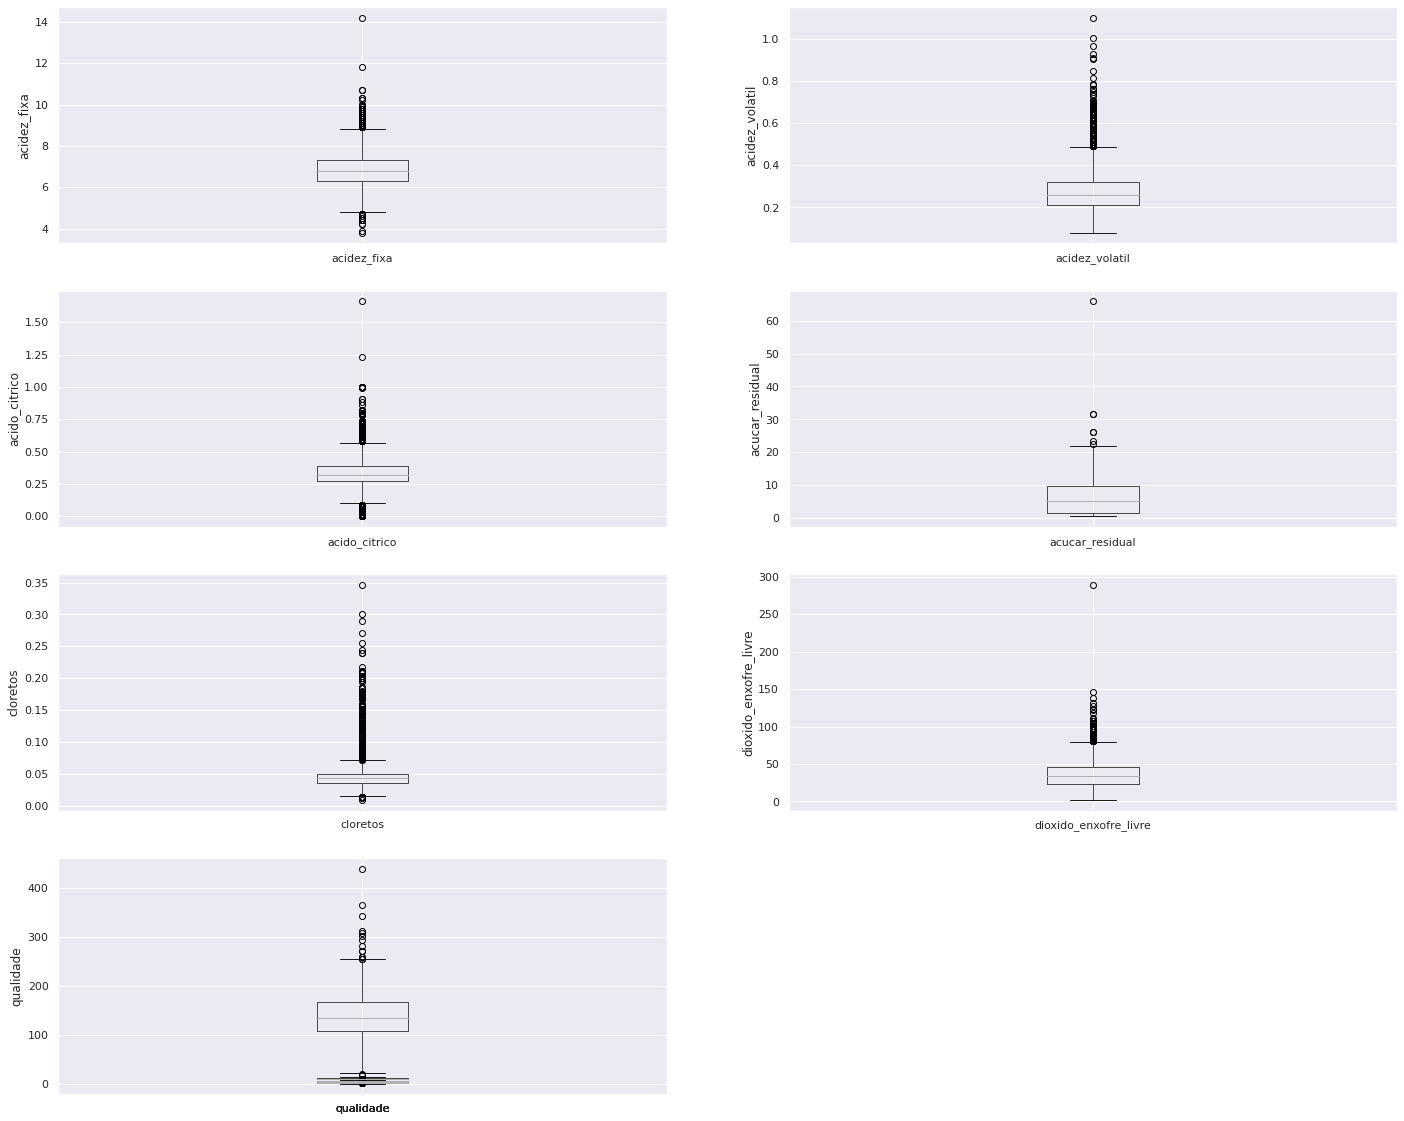

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='acidez_fixa')
fig.set_title('')
fig.set_ylabel('acidez_fixa')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='acidez_volatil')
fig.set_title('')
fig.set_ylabel('acidez_volatil')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='acido_citrico')
fig.set_title('')
fig.set_ylabel('acido_citrico')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='acucar_residual')
fig.set_title('')
fig.set_ylabel('acucar_residual')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='cloretos')
fig.set_title('')
fig.set_ylabel('cloretos')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='dioxido_enxofre_livre')
fig.set_title('')
fig.set_ylabel('dioxido_enxofre_livre')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='dioxido_enxofre_total')
fig.set_title('')
fig.set_ylabel('dioxido_enxofre_total')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='densidade')
fig.set_title('')
fig.set_ylabel('densidade')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='pH')
fig.set_title('')
fig.set_ylabel('pH')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='sulfatos')
fig.set_title('')
fig.set_ylabel('sulfatos')



plt.subplot(4, 2, 7)
fig = df.boxplot(column='alcool')
fig.set_title('')
fig.set_ylabel('alcool')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='qualidade')
fig.set_title('')
fig.set_ylabel('qualidade');

In [ ]:
#graficos de linha

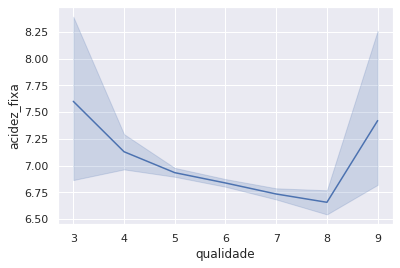

In [ ]:
sns.lineplot(x='qualidade', y='acidez_fixa', data=df);

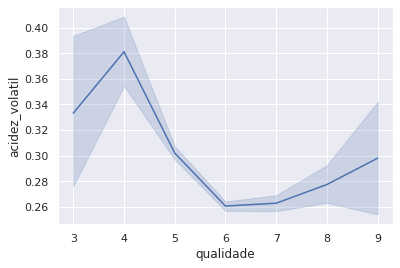

In [ ]:
sns.lineplot(x='qualidade', y='acidez_volatil', data=df);

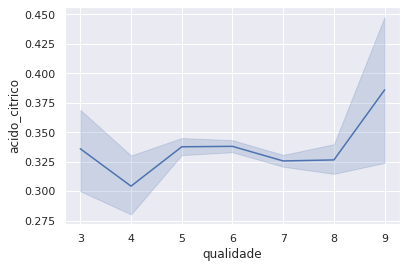

In [ ]:
sns.lineplot(x='qualidade', y='acido_citrico', data=df);

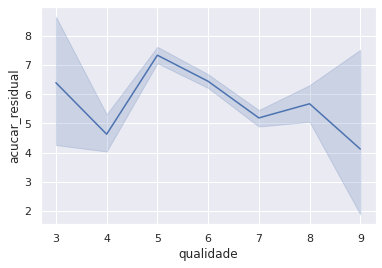

In [ ]:
sns.lineplot(x='qualidade', y='acucar_residual', data=df);

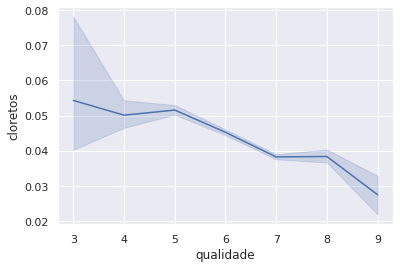

In [ ]:
sns.lineplot(x='qualidade', y='cloretos', data=df);

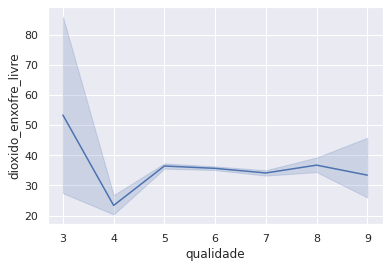

In [ ]:
sns.lineplot(x='qualidade', y='dioxido_enxofre_livre', data=df);

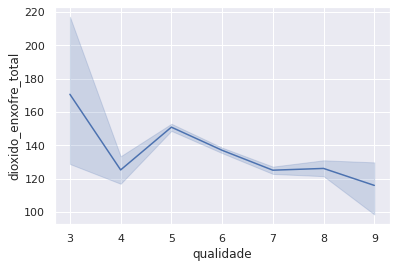

In [ ]:
sns.lineplot(x='qualidade', y='dioxido_enxofre_total', data=df);

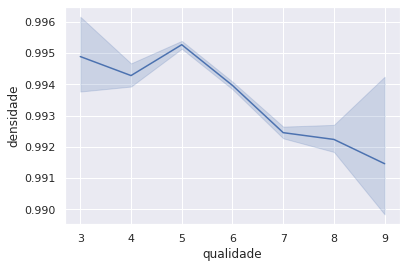

In [ ]:
sns.lineplot(x='qualidade', y='densidade', data=df);

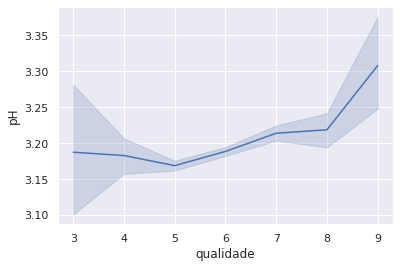

In [ ]:
sns.lineplot(x='qualidade', y='pH', data=df);

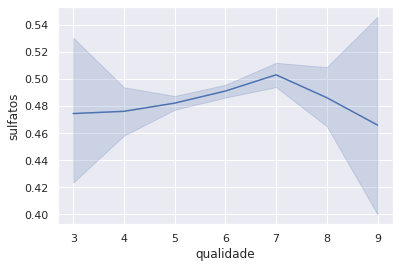

In [ ]:
sns.lineplot(x='qualidade', y='sulfatos', data=df);

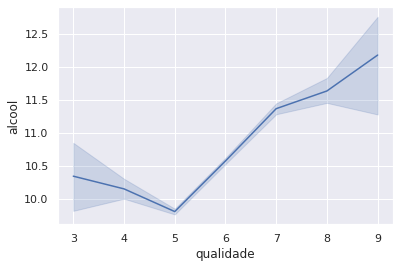

In [ ]:
sns.lineplot(x='qualidade', y='alcool', data=df);

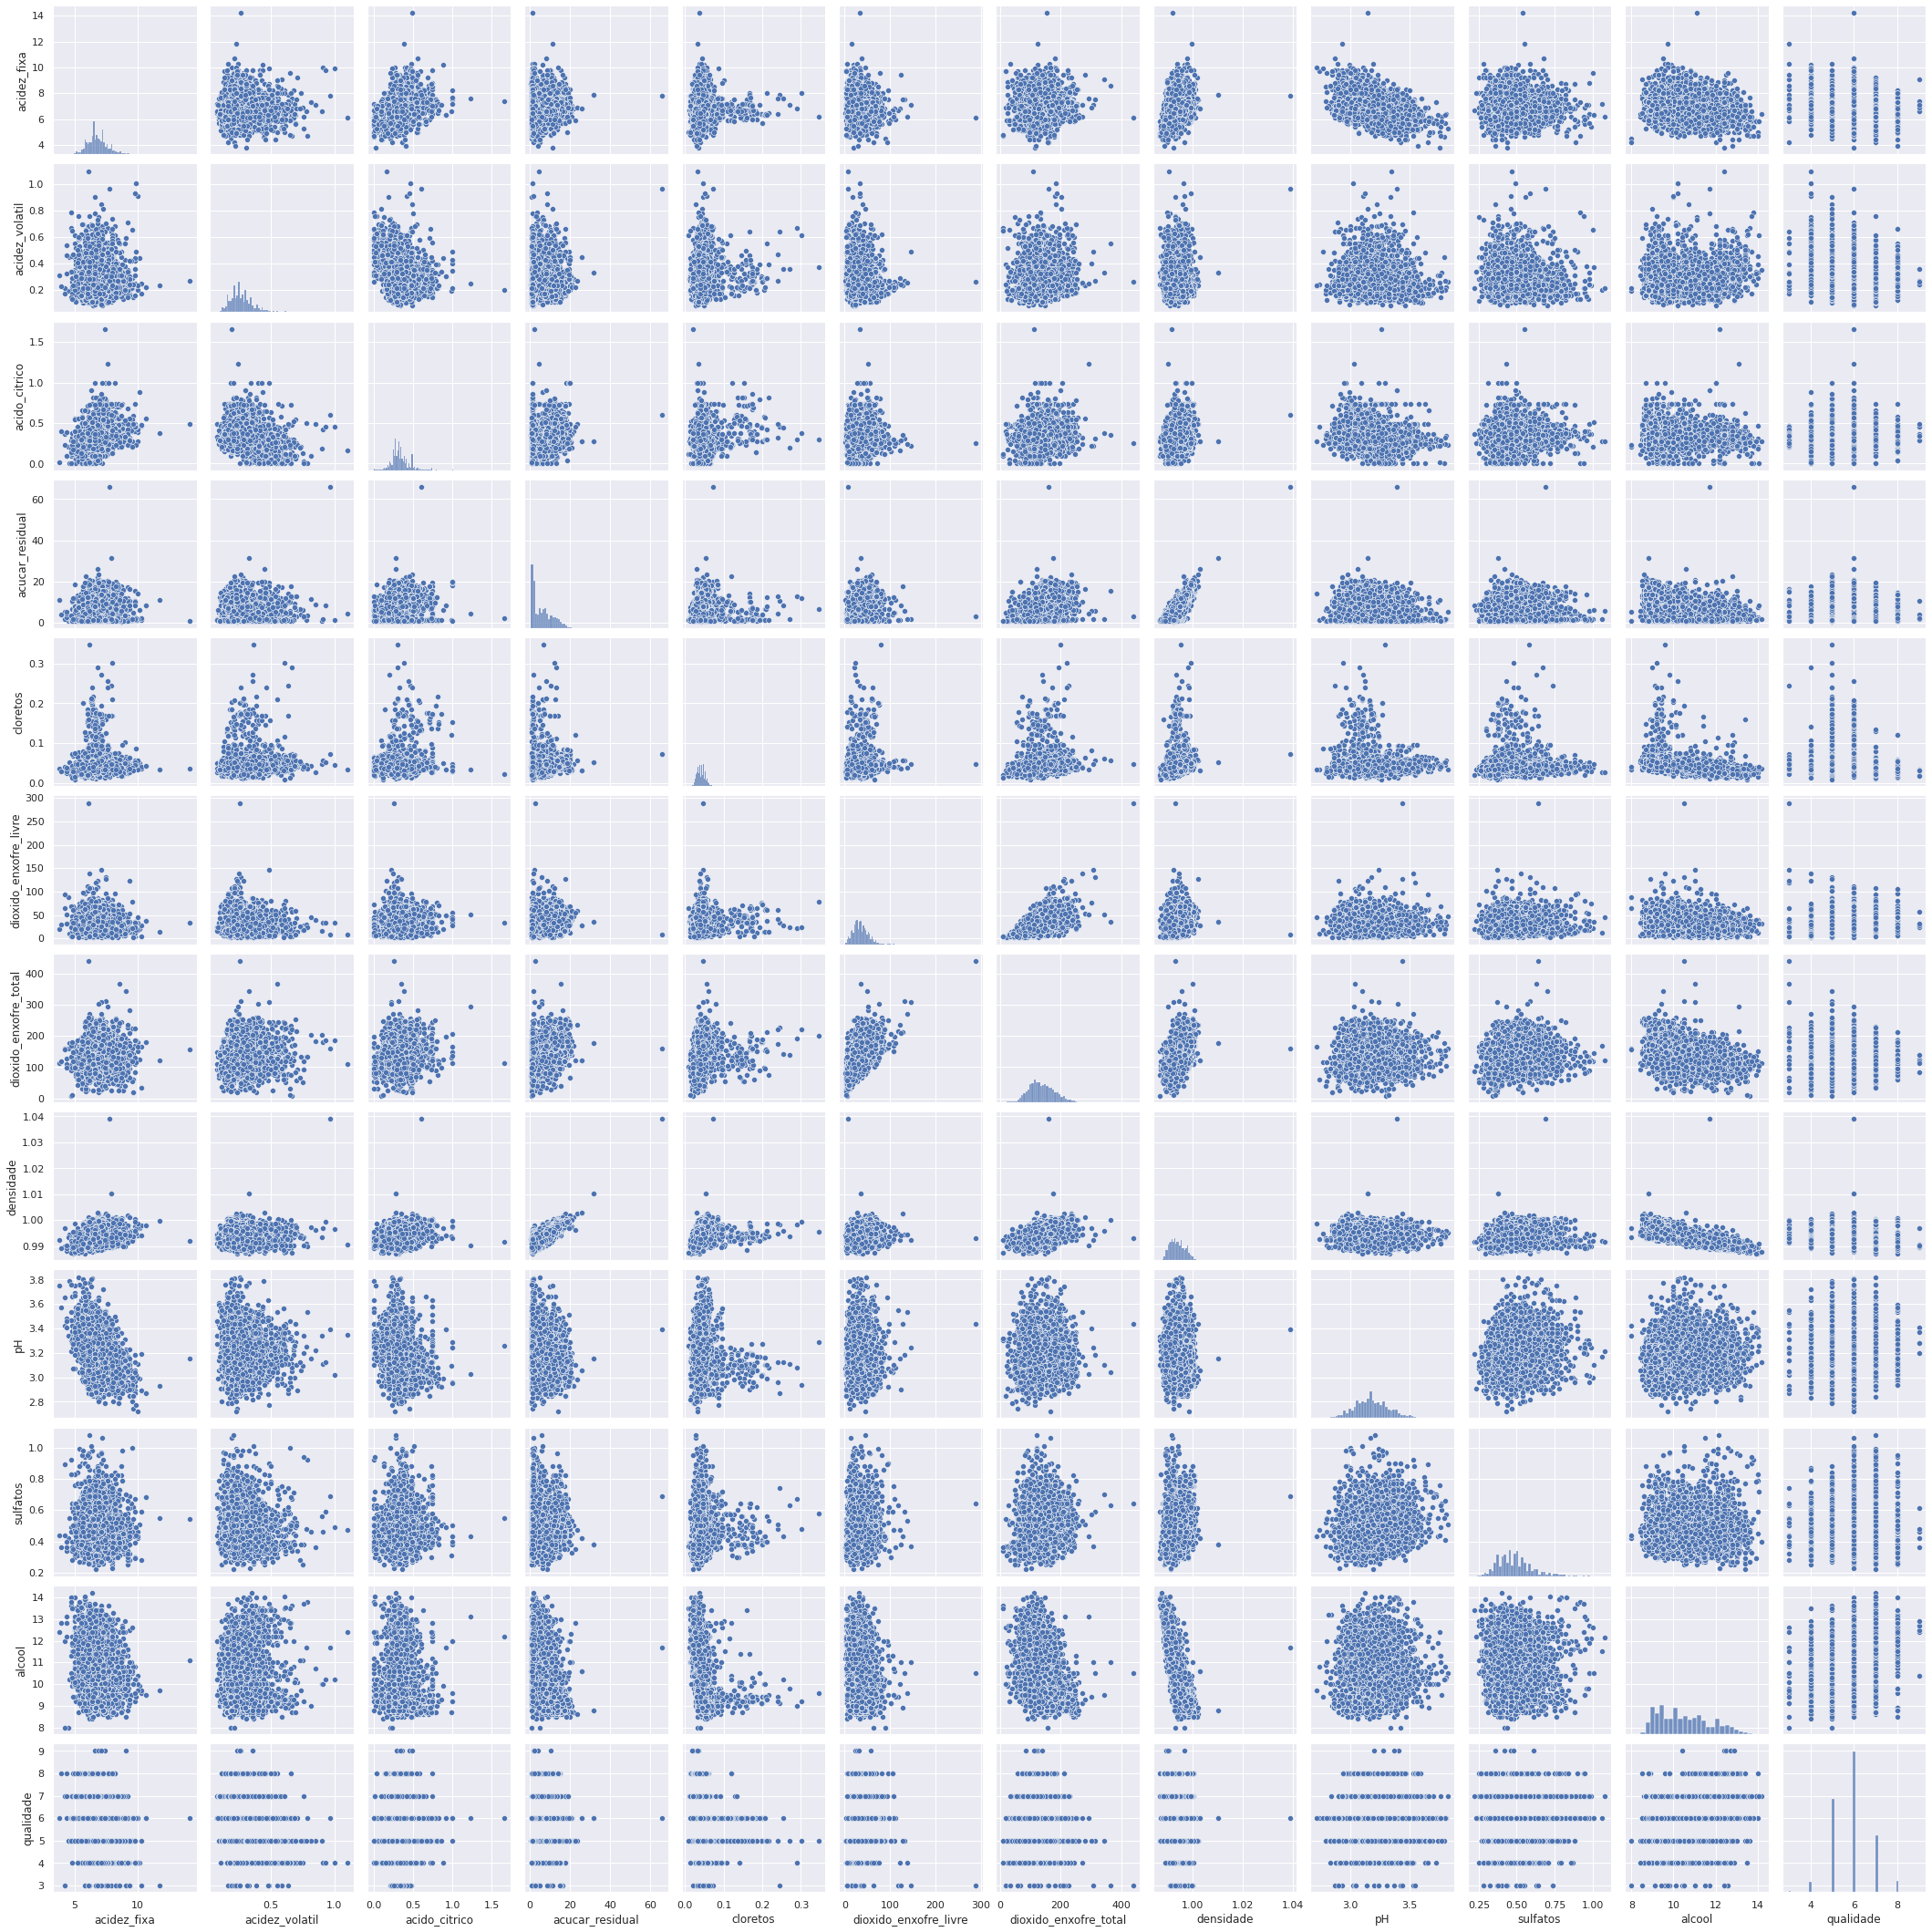

In [ ]:
sns.pairplot(df)

**ETAPA 1:**

In [ ]:
#matriz de correlação
corr = df.corr() * 100
corr

acidez_fixa  acidez_volatil  acido_citrico  \
acidez_fixa             100.000000       -2.269729      28.918070   
acidez_volatil           -2.269729      100.000000     -14.947181   
acido_citrico            28.918070      -14.947181     100.000000   
acucar_residual           8.902070        6.428606       9.421162   
cloretos                  2.308564        7.051157      11.436445   
dioxido_enxofre_livre    -4.939586       -9.701194       9.407722   
dioxido_enxofre_total     9.106976        8.926050      12.113080   
densidade                26.533101        2.711385      14.950257   
pH                      -42.585829       -3.191537     -16.374821   
sulfatos                 -1.714299       -3.572815       6.233094   
alcool                  -12.088112        6.771794      -7.572873   
qualidade               -11.366283      -19.472297      -0.920909   

                       acucar_residual    cloretos  dioxido_enxofre_livre  \
acidez_fixa                   8.902070    2.308564              -4.939586   
acidez_volatil                6.428606    7.051157              -9.701194   
acido_citrico                 9.421162   11.436445               9.407722   
acucar_residual             100.000000    8.868454              29.909835   
cloretos                      8.868454  100.000000              10.139235   
dioxido_enxofre_livre        29.909835   10.139235             100.000000   
dioxido_enxofre_total        40.143931   19.891030              61.550097   
densidade                    83.896645   25.721132              29.421041   
pH                          -19.413345   -9.043946              -0.061780   
sulfatos                     -2.666437    1.676288               5.921725   
alcool                      -45.063122  -36.018871             -25.010394   
qualidade                    -9.757683  -20.993441               0.815807   

                       dioxido_enxofre_total   densidade          pH  \
acidez_fixa                         9.106976   26.533101  -42.585829   
acidez_volatil                      8.926050    2.711385   -3.191537   
acido_citrico                      12.113080   14.950257  -16.374821   
acucar_residual                    40.143931   83.896645  -19.413345   
cloretos                           19.891030   25.721132   -9.043946   
dioxido_enxofre_livre              61.550097   29.421041   -0.061780   
dioxido_enxofre_total             100.000000   52.988132    0.232097   
densidade                          52.988132  100.000000   -9.359149   
pH                                  0.232097   -9.359149  100.000000   
sulfatos                           13.456237    7.449315   15.595150   
alcool                            -44.889210  -78.013762   12.143210   
qualidade                         -17.473722  -30.712331    9.942725   

                         sulfatos      alcool   qualidade  
acidez_fixa             -1.714299  -12.088112  -11.366283  
acidez_volatil          -3.572815    6.771794  -19.472297  
acido_citrico            6.233094   -7.572873   -0.920909  
acucar_residual         -2.666437  -45.063122   -9.757683  
cloretos                 1.676288  -36.018871  -20.993441  
dioxido_enxofre_livre    5.921725  -25.010394    0.815807  
dioxido_enxofre_total   13.456237  -44.889210  -17.473722  
densidade                7.449315  -78.013762  -30.712331  
pH                      15.595150   12.143210    9.942725  
sulfatos               100.000000   -1.743277    5.367788  
alcool                  -1.743277  100.000000   43.557472  
qualidade                5.367788   43.557472  100.000000

In [ ]:
#verificando qual característica tem maior afinidade com variavel target ("qualidade")
lista_sup = []
quant = 0
while quant < 12:
  if corr["qualidade"].values[quant] > 1 or corr["qualidade"].values[quant] < -10:
    if corr["qualidade"].index[quant] != "qualidade":
      lista_sup.append(corr["qualidade"].index[quant])
                       #+': '+str(corr["qualidade"].values[quant]))
  quant += 1
lista_sup

['acidez_fixa',
 'acidez_volatil',
 'cloretos',
 'dioxido_enxofre_total',
 'densidade',
 'pH',
 'sulfatos',
 'alcool']

In [ ]:
#CONCLUSÃO.: com base nos graficos de linha, verifiquei que quanto maior a 'qualidade' do vinho maior o valor das variveis 'pH', 'sulfatos', 'alcool'. 
  # Porém menor o valor das variaveis 'acidez_fixa', 'acidez_volatil', 'cloretos' e 'dioxido_enxofre_total'. 
  # Por este motivo selecionei as varivais com maior valor positivo e também negativo de correlação com a variavel 'qualidade'.

**ETAPA 2:**

In [ ]:
#criando a variavel 'classif_qualidade', para classificar o vinho como 'Bom' (1) se a qualidade >= 6 ou como 'Ruim' (0) se a qualidade < 6
lista_classif = []
for i in df['qualidade'].values:
  if i >= 6:
    lista_classif.append(1)
  else:
    lista_classif.append(0)

In [ ]:
df['classif_qualidade'] = lista_classif

In [ ]:
#criando novo data frame com as variavies com maior correlação com a variavel qualidade, mais a variavel classif_qualidade
df2 = df[['acidez_fixa',
 'acidez_volatil',
 'cloretos',
 'dioxido_enxofre_total',
 'densidade',
 'pH',
 'sulfatos',
 'alcool',
 'classif_qualidade']]

In [ ]:
# Verificando como os dados estão distribuídos, com relação as qualidade dos vinhos
num_true = len(df2.loc[df2['classif_qualidade'] == 1])
num_false = len(df2.loc[df2['classif_qualidade'] == 0])
print("Quantidade vinhos bons: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Quantidade vinhos ruins: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Quantidade vinhos bons: 3258 (66.52%)
Quantidade vinhos ruins: 1640 (33.48%)


In [ ]:
#seleção das variaveis preditoras
#atributos = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
#       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
#       'densidade', 'pH', 'sulfatos', 'alcool']

atributos = ['acidez_fixa',
 'acidez_volatil',
 'cloretos',
 'dioxido_enxofre_total',
 'densidade',
 'pH',
 'sulfatos',
 'alcool']

In [ ]:
#variável a ser prevista
atrib_prev = ['classif_qualidade']

In [ ]:
# Criando objetos
X = df2[atributos].values
Y = df2[atrib_prev].values

In [ ]:
# Definindo a taxa de split
split_test_size = 0.30

In [ ]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df2.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df2.index)) * 100))

69.99% nos dados de treino
30.01% nos dados de teste


In [ ]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

Naive Bayes

In [ ]:
nb_predict_train = modelo_v1.predict(X_treino)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))

Exatidão (Accuracy): 0.7121


In [ ]:
nb_predict_test = modelo_v1.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Accuracy): 0.7170


Random Forest

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.8265



Regressão Logística

In [ ]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7320

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.86      0.81       997
           0       0.61      0.47      0.53       473

    accuracy                           0.73      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.72      0.73      0.72      1470



In [ ]:
#Conclusão.: 
  # Accuracy Naive Bayes: 0.7170
  # Accuracy Random Forest: 0.8265
  # Accuracy Regressão Logística: 0.7320

# o modelo Random Forest apresentou melhor taxa de acerto com esta base de dados.

**ETAPA 3:**

In [ ]:
# Excluindo os outliers

aux = df['acidez_fixa'] > 5

df_semout = df[aux]

aux = df_semout['acidez_fixa'] < 9

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['acidez_volatil'] < 0.5

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['acido_citrico'] > 0.10

df_semout = df_semout[aux]

aux = df_semout['acido_citrico'] < 0.55

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['acucar_residual'] < 21

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['dioxido_enxofre_livre'] < 80

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['qualidade'] < 260

df_semout = df_semout[aux]

In [ ]:
aux = df_semout['cloretos'] < 0.07

df_semout = df_semout[aux]

In [ ]:
df.shape

(4898, 13)

In [ ]:
df_semout.shape

(4129, 13)

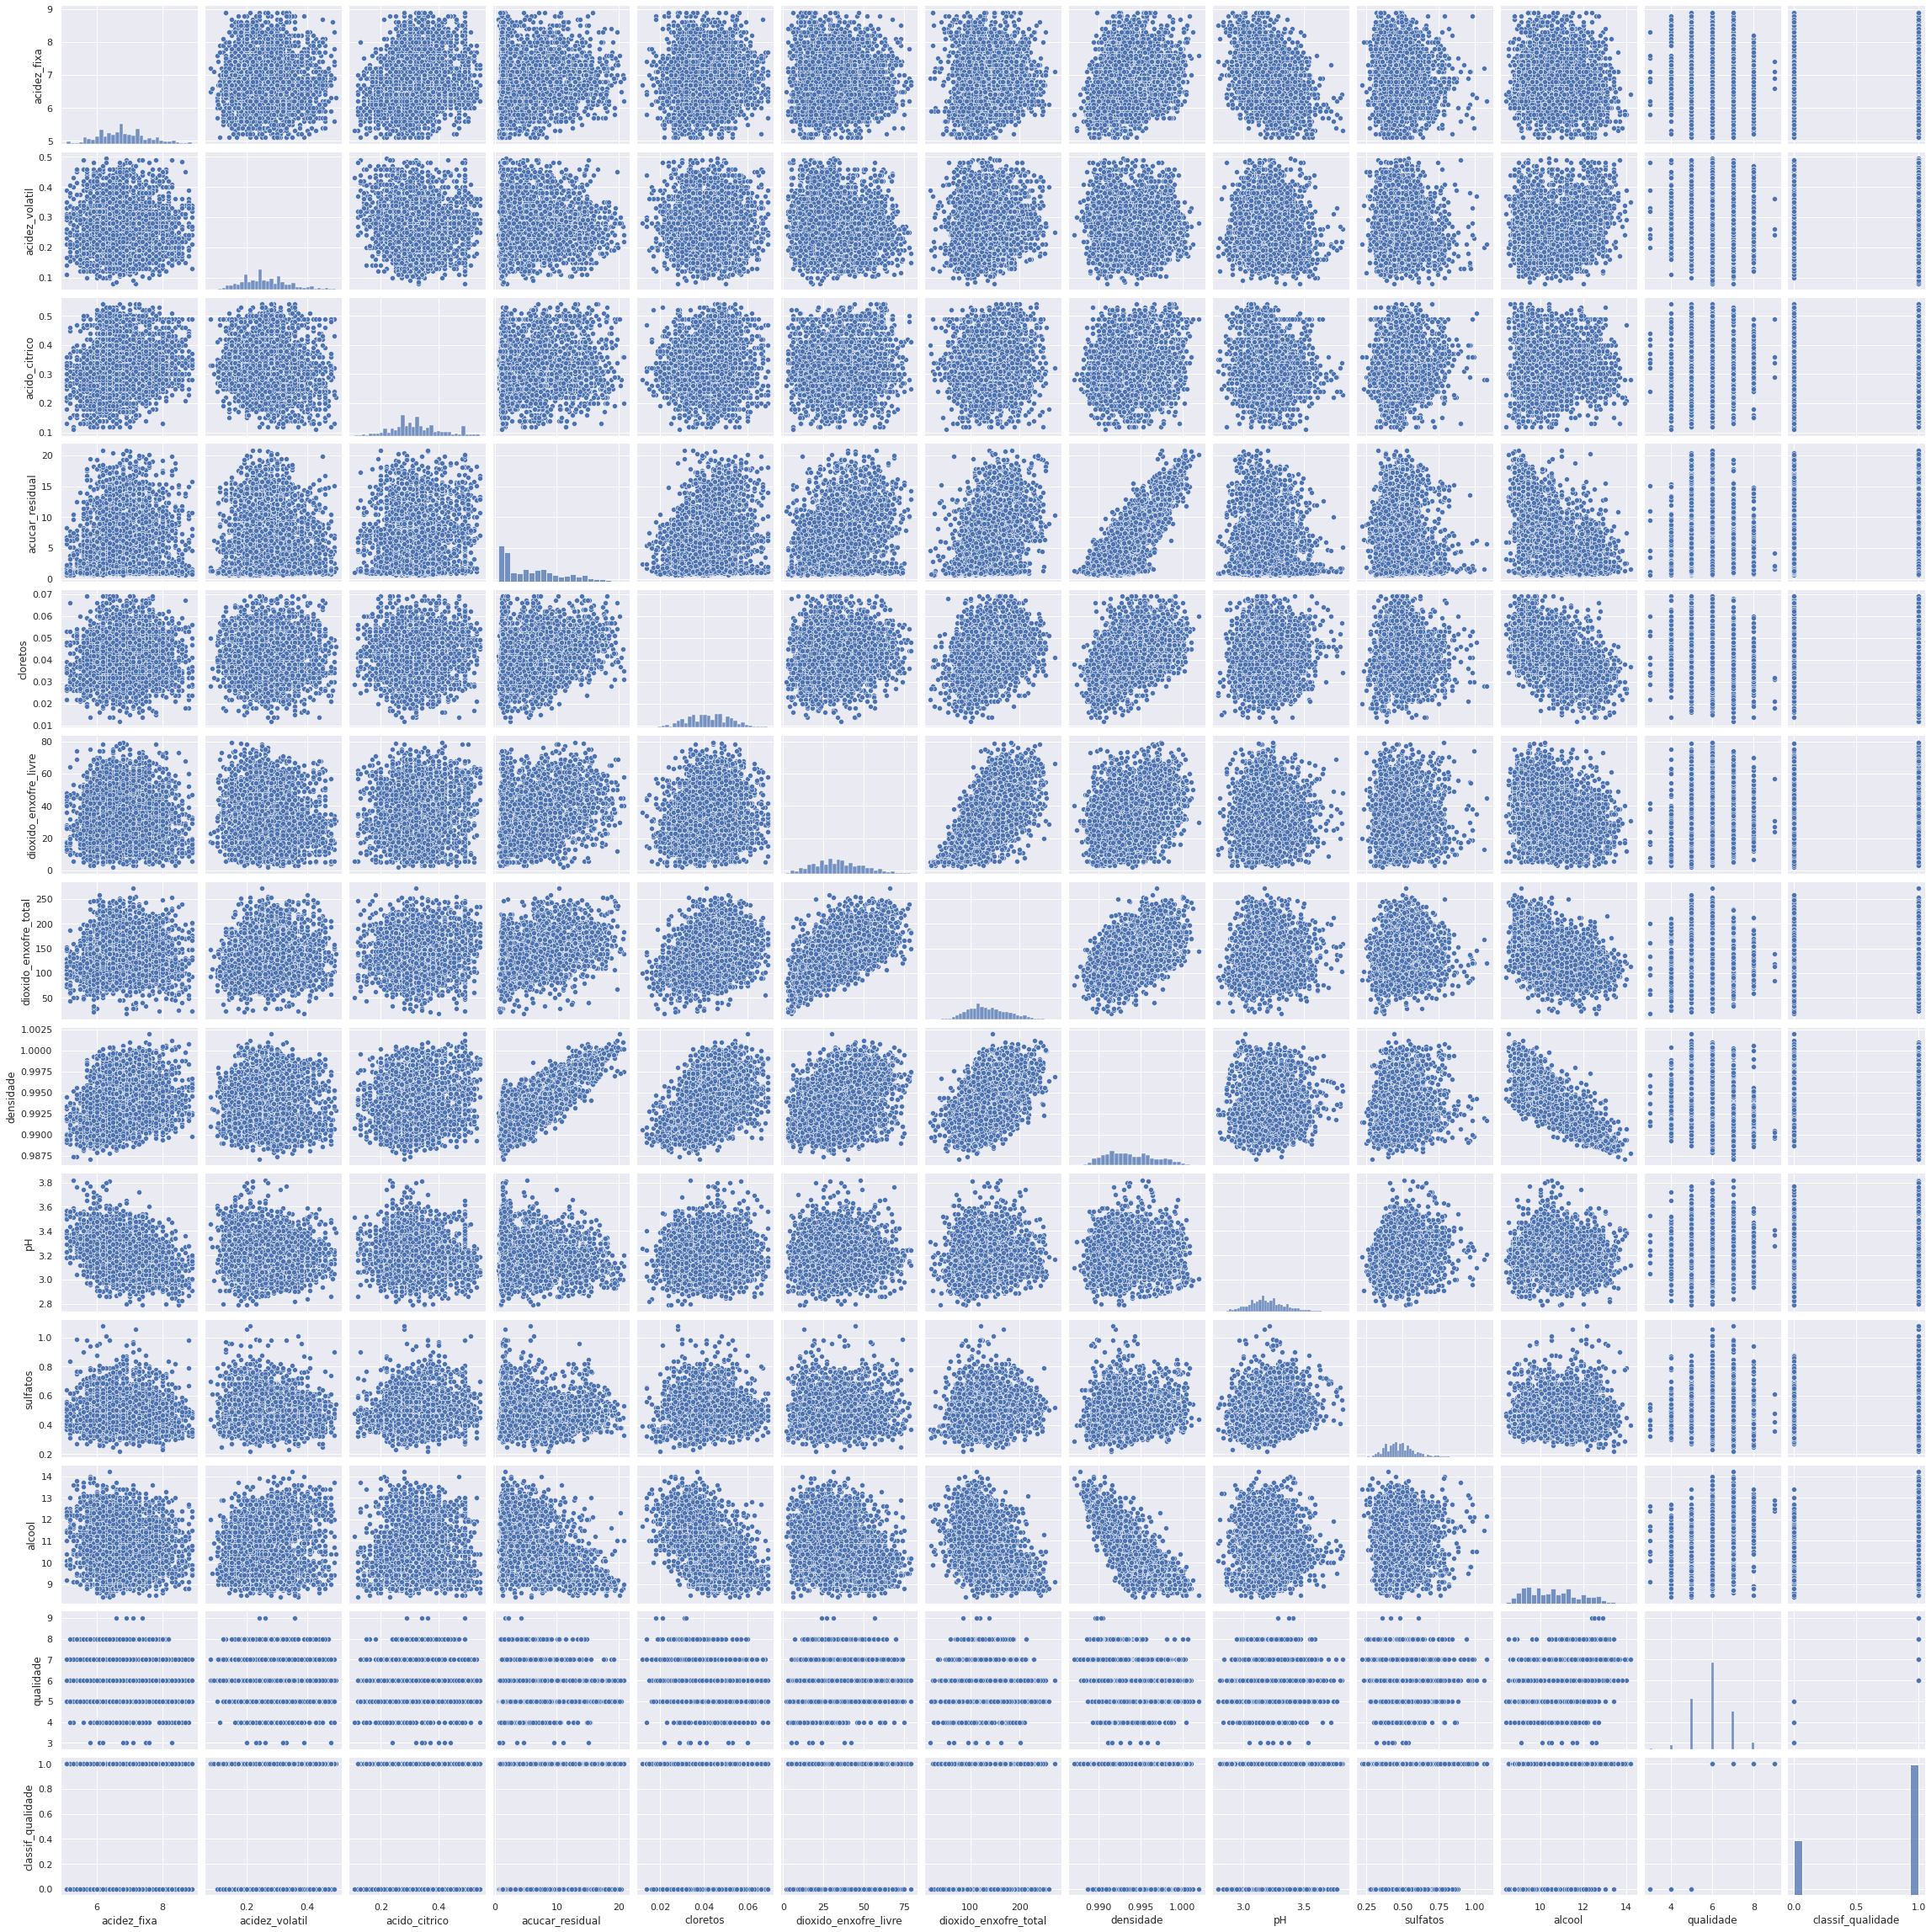

In [ ]:
sns.pairplot(df_semout)

<ipython-input-57-e863419b5fda>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 2, 7)
<ipython-input-57-e863419b5fda>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 2, 7)
<ipython-input-57-e863419b5fda>:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

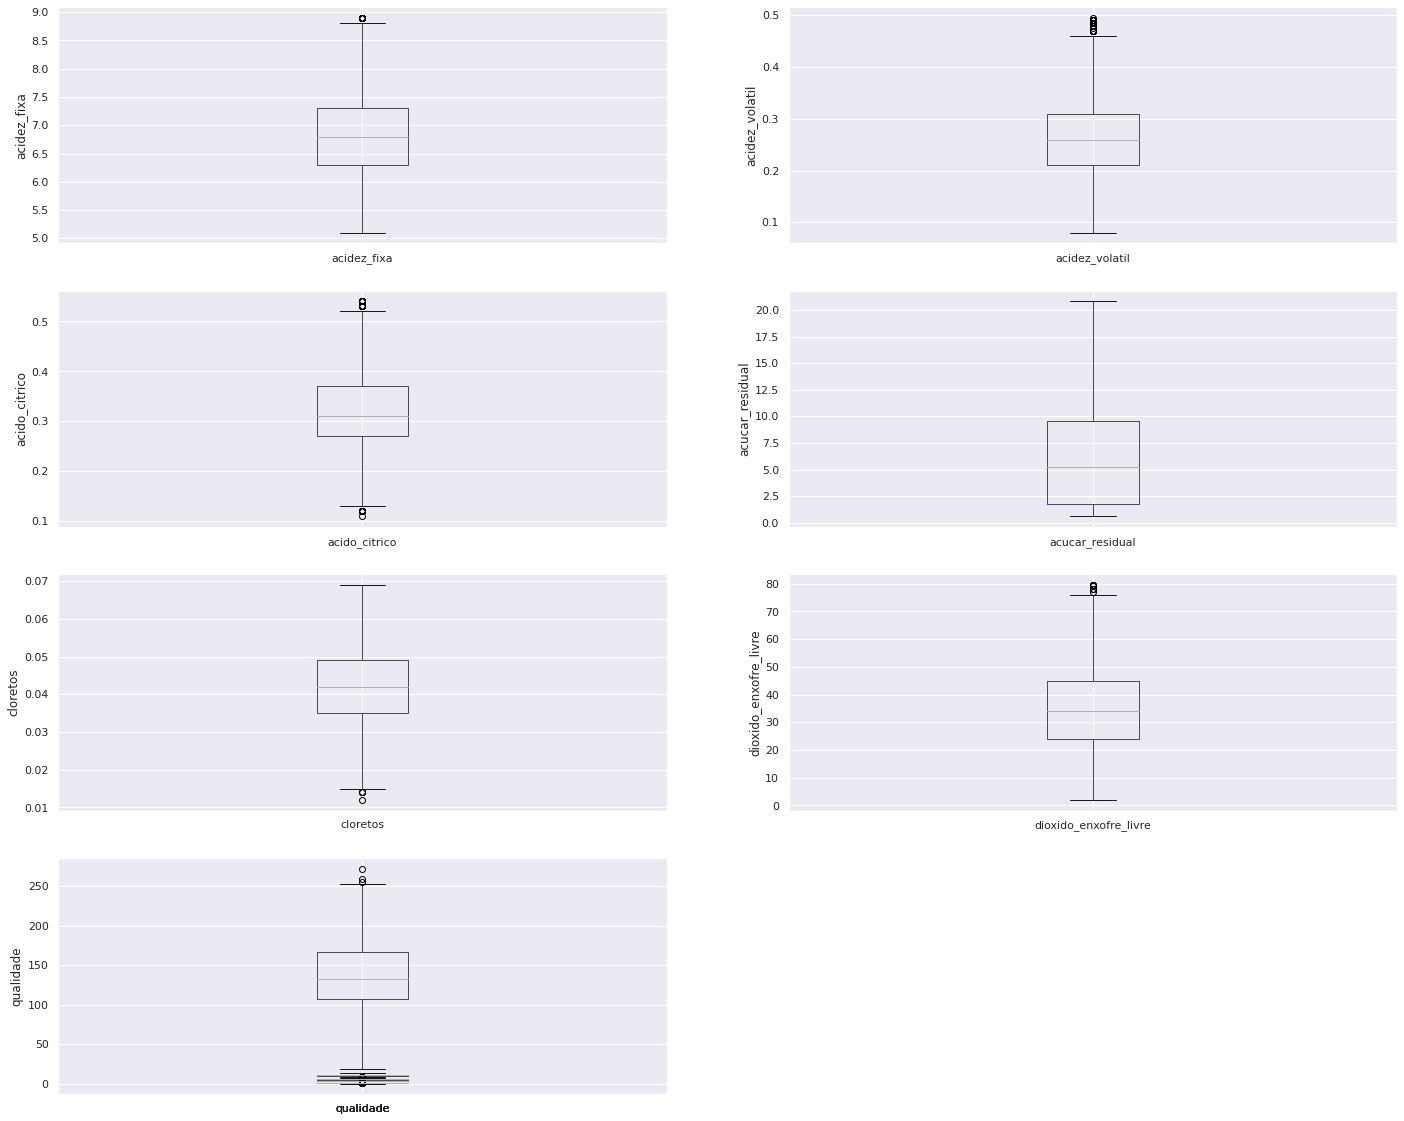

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df_semout.boxplot(column='acidez_fixa')
fig.set_title('')
fig.set_ylabel('acidez_fixa')


plt.subplot(4, 2, 2)
fig = df_semout.boxplot(column='acidez_volatil')
fig.set_title('')
fig.set_ylabel('acidez_volatil')


plt.subplot(4, 2, 3)
fig = df_semout.boxplot(column='acido_citrico')
fig.set_title('')
fig.set_ylabel('acido_citrico')

plt.subplot(4, 2, 4)
fig = df_semout.boxplot(column='acucar_residual')
fig.set_title('')
fig.set_ylabel('acucar_residual')

plt.subplot(4, 2, 5)
fig = df_semout.boxplot(column='cloretos')
fig.set_title('')
fig.set_ylabel('cloretos')

plt.subplot(4, 2, 6)
fig = df_semout.boxplot(column='dioxido_enxofre_livre')
fig.set_title('')
fig.set_ylabel('dioxido_enxofre_livre')


plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='dioxido_enxofre_total')
fig.set_title('')
fig.set_ylabel('dioxido_enxofre_total')


plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='densidade')
fig.set_title('')
fig.set_ylabel('densidade')


plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='pH')
fig.set_title('')
fig.set_ylabel('pH')


plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='sulfatos')
fig.set_title('')
fig.set_ylabel('sulfatos')



plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='alcool')
fig.set_title('')
fig.set_ylabel('alcool')


plt.subplot(4, 2, 7)
fig = df_semout.boxplot(column='qualidade')
fig.set_title('')
fig.set_ylabel('qualidade');

In [ ]:
# feature Scaling
cols = df_semout.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_semout)

df_scaled = scaler.transform(df_semout)

df_scaled = pd.DataFrame(df_scaled, columns=[cols])

df_scaled.describe().round(2)

acidez_fixa acidez_volatil acido_citrico acucar_residual cloretos  \
count     4129.00        4129.00       4129.00         4129.00  4129.00   
mean         0.00          -0.00          0.00            0.00    -0.00   
std          1.00           1.00          1.00            1.00     1.00   
min         -2.34          -2.36         -2.58           -1.17    -3.04   
25%         -0.72          -0.68         -0.65           -0.93    -0.73   
50%         -0.04          -0.04         -0.17           -0.23    -0.02   
75%          0.64           0.61          0.56            0.67     0.69   
max          2.80           3.00          2.61            2.96     2.70   

      dioxido_enxofre_livre dioxido_enxofre_total densidade       pH sulfatos  \
count               4129.00               4129.00   4129.00  4129.00  4129.00   
mean                  -0.00                  0.00      0.00     0.00    -0.00   
std                    1.00                  1.00      1.00     1.00     1.00   
min                   -2.17                 -2.87     -2.35    -2.75    -2.39   
25%                   -0.71                 -0.73     -0.79    -0.64    -0.72   
50%                   -0.05                 -0.09     -0.09    -0.09    -0.10   
75%                    0.69                  0.71      0.70     0.59     0.52   
max                    2.98                  3.29      2.82     4.26     5.20   

        alcool qualidade classif_qualidade  
count  4129.00   4129.00           4129.00  
mean      0.00     -0.00              0.00  
std       1.00      1.00              1.00  
min      -1.81     -3.44             -1.55  
25%      -0.90     -1.11             -1.55  
50%      -0.08      0.05              0.65  
75%       0.66      0.05              0.65  
max       2.97      3.54              0.65

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

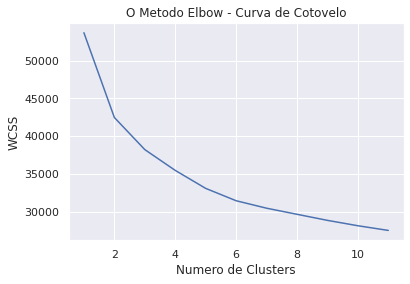

In [ ]:
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 12), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Silhueta
for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 2 clusters : 0.1943898844542205


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 3 clusters : 0.1820215114388376


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 4 clusters : 0.16673044776353077


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 5 clusters : 0.13761895048473874


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 6 clusters : 0.1318881433737076


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 7 clusters : 0.1298219198297618


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 8 clusters : 0.12667590954514352


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 9 clusters : 0.11556324167494983


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Silhueta para 10 clusters : 0.11563428190551105


In [ ]:
df_scaled.head()

acidez_fixa acidez_volatil acido_citrico acucar_residual  cloretos  \
0    0.229874       0.091651      0.438050        2.938156  0.282402   
1   -0.718667       0.479118      0.196519       -0.962574  0.685595   
2    1.720440       0.220806      0.921113        0.119828  0.786394   
3    0.500886      -0.424972     -0.045013        0.446591  1.592781   
4    0.500886      -0.424972     -0.045013        0.446591  1.592781   

  dioxido_enxofre_livre dioxido_enxofre_total densidade        pH  sulfatos  \
0              0.685085              0.806898  2.482130 -1.318530 -0.362071   
1             -1.374216             -0.118197  0.044588  0.724173 -0.008917   
2             -0.311351             -0.970259  0.427630  0.451812 -0.450360   
3              0.817943              1.196412  0.601740 -0.024819 -0.803514   
4              0.817943              1.196412  0.601740 -0.024819 -0.803514   

     alcool qualidade classif_qualidade  
0 -1.480658  0.051885          0.646848  
1 -0.903704  0.051885          0.646848  
2 -0.409172  0.051885          0.646848  
3 -0.574016  0.051885          0.646848  
4 -0.574016  0.051885          0.646848

In [ ]:
Modelo_Kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 0   )
Modelo_Kmeans

KMeans(n_clusters=5, random_state=0)

In [ ]:
Segmentos = Modelo_Kmeans.fit(df_scaled)
Segmentos

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
Segmentos.cluster_centers_

array([[-0.28921256, -0.59237027, -0.09084503, -0.57244074,  0.08886864,
        -0.08737169, -0.19522123, -0.309608  ,  0.61024616,  0.3971249 ,
         0.01336508,  0.40515655,  0.61903726],
       [ 0.33412773,  0.17467944, -0.12940348, -0.6353714 ,  0.09190821,
        -0.90452489, -0.53255849, -0.25355082, -0.16697561, -0.19689071,
        -0.15297303, -1.26072822, -1.49689268],
       [-0.06819608,  0.37818957,  0.04252323,  0.90027262,  0.6569091 ,
         0.75699754,  0.98584626,  1.02926567, -0.07631431,  0.02911976,
        -0.94156676, -1.16186156, -1.54595717],
       [-0.06556294,  0.35551912,  0.01263519, -0.44952792, -0.89641063,
        -0.35891643, -0.63993053, -0.97114267, -0.21539674, -0.31016939,
         1.18318803,  0.74899982,  0.64486221],
       [ 0.27850429, -0.16261929,  0.16258692,  1.12338183,  0.54579071,
         0.67672829,  0.75223925,  1.12667914, -0.30926638,  0.03990718,
        -0.80743935,  0.29277878,  0.64684845]])

In [ ]:
distance = Modelo_Kmeans.fit_transform(df_scaled)
distance

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[5.42473783, 5.86394031, 3.87775113, 6.09211599, 2.65281645],
       [2.20344648, 3.15589274, 4.19330941, 3.37505185, 3.61257721],
       [2.98857982, 3.45239312, 4.12617133, 3.5698223 , 3.0552879 ],
       ...,
       [2.92013839, 3.4876219 , 4.66943166, 3.3165279 , 3.95117853],
       [4.14281121, 5.32301033, 6.94184268, 2.89754767, 6.32689881],
       [3.80082   , 4.55945779, 6.38465352, 2.82435795, 5.82833594]])

In [ ]:
labels = Modelo_Kmeans.labels_
labels

array([4, 0, 0, ..., 0, 3, 3], dtype=int32)

In [ ]:
clusters = Modelo_Kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
Counter(clusters.tolist())

Counter({4: 783, 0: 1025, 1: 581, 3: 1104, 2: 636})

In [ ]:
df_semout['Cluster_Id'] = labels
df_semout.head(54)

<ipython-input-109-c97ff510ce1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semout['Cluster_Id'] = labels


acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0           7.0            0.27           0.36            20.70     0.045   
1           6.3            0.30           0.34             1.60     0.049   
2           8.1            0.28           0.40             6.90     0.050   
3           7.2            0.23           0.32             8.50     0.058   
4           7.2            0.23           0.32             8.50     0.058   
5           8.1            0.28           0.40             6.90     0.050   
6           6.2            0.32           0.16             7.00     0.045   
7           7.0            0.27           0.36            20.70     0.045   
8           6.3            0.30           0.34             1.60     0.049   
9           8.1            0.22           0.43             1.50     0.044   
10          8.1            0.27           0.41             1.45     0.033   
11          8.6            0.23           0.40             4.20     0.035   
12          7.9            0.18           0.37             1.20     0.040   
13          6.6            0.16           0.40             1.50     0.044   
15          6.6            0.17           0.38             1.50     0.032   
18          7.4            0.34           0.42             1.10     0.033   
19          6.5            0.31           0.14             7.50     0.044   
21          6.4            0.31           0.38             2.90     0.038   
22          6.8            0.26           0.42             1.70     0.049   
24          6.6            0.27           0.41             1.30     0.052   
25          7.0            0.25           0.32             9.00     0.046   
26          6.9            0.24           0.35             1.00     0.052   
27          7.0            0.28           0.39             8.70     0.051   
28          7.4            0.27           0.48             1.10     0.047   
29          7.2            0.32           0.36             2.00     0.033   
30          8.5            0.24           0.39            10.40     0.044   
31          8.3            0.14           0.34             1.10     0.042   
32          7.4            0.25           0.36             2.05     0.050   
33          6.2            0.12           0.34             1.50     0.045   
34          5.8            0.27           0.20            14.95     0.044   
36          6.5            0.39           0.23             5.40     0.051   
37          7.0            0.33           0.32             1.20     0.053   
38          7.3            0.24           0.39            17.95     0.057   
39          7.3            0.24           0.39            17.95     0.057   
42          7.0            0.31           0.26             7.40     0.069   
43          6.6            0.24           0.27             1.40     0.057   
44          6.7            0.23           0.26             1.40     0.060   
45          7.4            0.18           0.31             1.40     0.058   
46          6.2            0.45           0.26             4.40     0.063   
47          6.2            0.46           0.25             4.40     0.066   
48          7.0            0.31           0.26             7.40     0.069   
49          6.9            0.19           0.35             5.00     0.067   
50          7.2            0.19           0.31             1.60     0.062   
51          6.6            0.25           0.29             1.10     0.068   
52          6.2            0.16           0.33             1.10     0.057   
53          6.4            0.18           0.35             1.00     0.045   
55          6.9            0.25           0.35             1.30     0.039   
56          7.2            0.21           0.34            11.90     0.043   
57          6.0            0.19           0.26            12.40     0.048   
58          6.6            0.38           0.15             4.60     0.044   
59          7.4            0.20           0.36             1.20     0.038   


In [ ]:
# Box plot to visualize Cluster Id vs Frequency
# Transforma classe em categorica
df_semout['Cluster_Id'] = df_semout['Cluster_Id'].astype('string')

<ipython-input-110-911fdd1a1e0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semout['Cluster_Id'] = df_semout['Cluster_Id'].astype('string')


In [ ]:
df_semout.columns

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade',
       'classif_qualidade', 'Cluster_Id'],
      dtype='object')

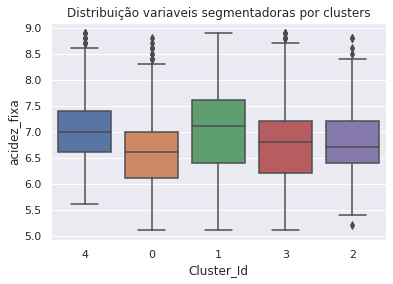

In [ ]:
 # Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sns.boxplot(x='Cluster_Id', y='acidez_fixa', data=df_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

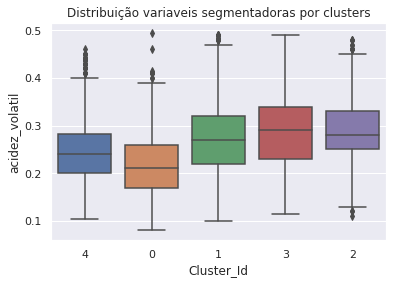

In [ ]:
import matplotlib.pyplot as plt  
sns.boxplot(x='Cluster_Id', y='acidez_volatil', data=df_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

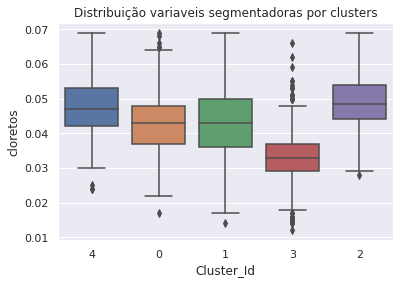

In [ ]:
import matplotlib.pyplot as plt  
sns.boxplot(x='Cluster_Id', y='cloretos', data=df_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

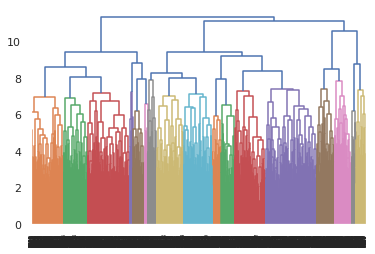

In [ ]:
# Complete linkage

mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

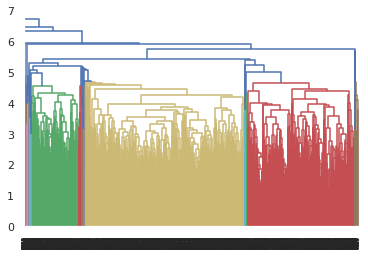

In [ ]:
# Average linkage

mergings = linkage(df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()